# Lesson I

## Limits of simple Regression

In this chapter we'll get farther into regression, including multiple regression and logistic regression. But first let's understand the limits of simple regression.

In a previous exercise, we made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit.

Here's what it looks like:

<img src='pictures/incomevegetables.jpg' />

The slope of the line is **0.07**, which means that the difference between the lowest and highest income brackets is about **0.49** servings per day.

It was an arbitrary choice to plot vegetables as a function of income. We could've plotted it the other way around, like this:

<img src='pictures/vegetablesincome.jpg' />

The slope of this line is **0.23**, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from 5 to 7. If we check the codebook, income of 5 is : $30,000 per year and code 7 is : $65,000. 

So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference.

This example shows that ***regression is not symmetric***; the regression of A onto B is not same as the regression of B onto A.

We can see that more clearly by putting two figures side by side and plotting both regression lines on both figures:

<img src='pictures/notsymmetric.jpg' />

* On the Left, we treat income as a known quantity and vegetable consumption as random.
* On the right, vegetable consumption is known and income is random.

This example meant to demonstrate another point, which is that ***regression doesn't tell you much about cousation.***

If you think people with lower income can't afford vegetables, we might look at the figure on the left and conclude that it doesn't make much difference.

If you think better diet increases income, the figure on the right might make you think it does.

But in general, regression can't tell you what causes what.

However, we have tools for teasing apart relationships amon multiple variables; one of the most important is ***multiple regression***. ``Scipy`` *doesn't* do multiple regression, so we have to use a different library, ``StatsModels``

Here's the import statement and how to use it:

```python
    import statsmodels.formula.api as smf
    results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
    results.params

    # Output:
    '''
    Intercept   5.399903
    _VEGESU1    0.232515
    dtype: float64
    '''
```

``ols`` stants for : **"Ordinary least Squares"**, another name for regression.

* First argument: formula string that specifies that we want to regress income asa function of vegetable consumption.
* Second argument: BRFSS DataFrame

The result from ``ols()`` represents the model; we have to run ``.fit()`` to get the results.

The results object containt a lot of information, but first thing we'll look at the ``.params``, Which contains;
* Estimated slope and intercept

## Exercise

### Using StatsModels

Let's run the same regression using ``SciPy`` and ``StatsModels`` and confirm we get the same results.

In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.formula.api as smf

# BRFSS DataFRame
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')
# GSS DataFrame
gss = pd.read_hdf('datasets/gss.hdf5', 'gss')

In [3]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run Regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


# Lesson II

## Multiple Regression

We'll use data from the General Social Survey from chapter 2, and we'll explore variables that are related to income.

In [6]:
# Regression of real income as a function of years of education.
results = smf.ols('realinc ~ educ', data=gss).fit()
# realinc is the variable we are trying to predict.
# educ is the variable we are using to inform the predictions.
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

Estimated slope is : **3586**, which means:
***each additional year of education is associated with an increase of almost $3600 of income.***

Income also depens on age, so it would be good to include that in the model, too.

In [7]:
# Adding Age
results = smf.ols('realinc ~ educ + age', data=gss).fit()
# We can list as many variables as we like
# '+' sign : indicates that we expect the contributions of the two variables to be additive.
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

Estimated slope : **3655**, little bit higher than the previous model
estimated slope for age : **$80**, which is small!

To see what's going on, let's look more closely at the relationships between income and age. We'll use ``groupby()`` in this case.

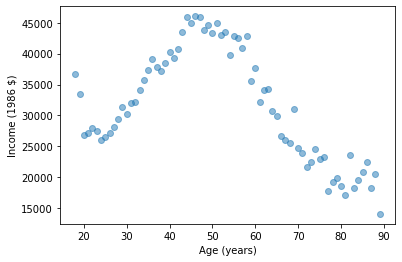

In [27]:
# Grouped by age
grouped = gss.groupby('age')

# Calculate the mean of income by age
mean_income_by_age = grouped['realinc'].mean()

# Plot the data
plt.plot(mean_income_by_age, 'o', alpha=0.5)

# Label the Axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

# Show plot
plt.show()

Average income increases from age 20 to 50, then starts to fall. This explains why the estimated slope is so small, 'Cause relationship is **non-linear**.

***Correlation and simple regression can't measure non-linear relationships. But multiple regression can!***

To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables.

In [9]:
# We'll create a new variable called age2 that equals age squared.
gss['age2'] = gss['age']**2

# Now we can run a regression with both 'age' and 'age2'
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()

results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

The slope associated with age is : **$1700**
Slope associated with age2 is : **-17**

In the next lesson we'll see methods to visualize regression results.

## Exercise

### Plot income and education

To get a closer look at the relationship between income and education. Use the variable ``educ`` to group the data, then plot the mean income in each group.

In [ ]:
# Group by educ
grouped = gss['educ']

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.scatter(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

# Show plot
plt.show()

In [23]:
# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and  age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the results
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

# Lesson III

## Visualizing Regression Results

Previously, we ran a multiple regression model to characterize the relationship between income and age. Because the model is *non-linear*, the parameters are hard to interpret.

In this lesson, we'll see a way to interpret them visually, and to validate them against data.

Here's the model from previous exercise one again:

In [24]:
# First we create new variables for educ squared and age squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2

# We run the regression model with educ, educ2, age, and age2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()

print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


***The parameters are hard to interpret. Fortunately we don't have to!...***

Sometimes best way to understand a model is by looking at its predictions rather than its parameters.

### Generating Predictions

*The regression results object* provides a method called ``predict()``, which uses the model to generate predictions.

It takes a *DataFrame* as a parameter and returns a *Series* with a prediction for each row in the DataFrame.

In [31]:
# To use it we create a new DataFrame : df
df = pd.DataFrame()

# DataFrame consists of age from 18 to 85
df['age'] = np.linspace(18, 85)
# Squared age
df['age2'] = df['age']**2

# We pick a level for educ : 
# 12 : High School
# 14 : Assosiate    
# 16 : Bachelor
df['educ'] = 12
df['educ2'] = df['educ']**2

# Predict the average income for each age group and holding education constant.
pred12 = results.predict(df)

### Plotting predictions

The result from ``predict()`` is a Series with one predicion for each row. So we can plot like this:

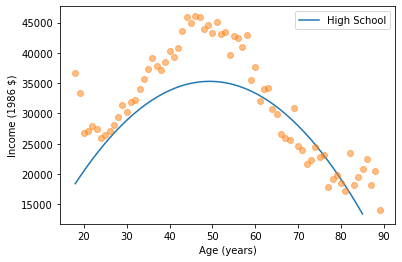

In [34]:
# Age on the X-axis, Predicted income for each age on y-axis
plt.plot(df['age'], pred12, label='High School')

# We can plot the data again for comparision
# Grouped by age
grouped = gss.groupby('age')

# Calculate the mean of income by age
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

# Show the plot
plt.show()


The orange dots show the average income in each age group. Blue line shows the predictions generated by the model, holding education constant.

We can do the same thing with other levels of education, like 14 years and 16 years.

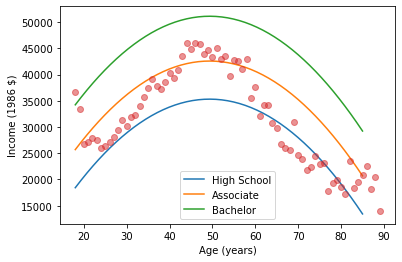

In [35]:
# Education = 12
plt.plot(df['age'], pred12, label='High School')

# Education = 14
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
# Education = 16
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')

# We can plot the data again for comparision
# Grouped by age
grouped = gss.groupby('age')

# Calculate the mean of income by age
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

# Show the plot
plt.show()

And here are the results. The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

# Lesson IV

## Logistic Regression

To understand logistic regression, we have to start with **categorical variables.**

* **Numerical Variables** : income, age, years of education.
* **Categorical Variables** : Sex, Race.

With ``StatsModels``, it is easy to include a categorical variable as part of a regression model.

Here's how:

In [36]:
# The letter 'C' indicates that sex is a categorical variable
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

The regression treats the value ``sex=1``, which is *male*, as the *default*, and reports the difference associated with the value ``sex=2``, which is *female*.

So this result indicates that income for women is about *$4100* less than for men, after controlling for age and education.

### Boolean Variable

If a categorical variable has only two values, it's called a **boolean variable**. For example, one of the questions in the GSS is :
> "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could by a gun?"

The answer to this question is in variable called ``gunlaw``.

* 1 means yes
* 2 means no

To explore relationship between ``gunlaw`` and factors like age,sex and education, we can use logistic regression.

``StatsModels`` provides logistic regression, but to use it, we have to recode the variable;

so ``1`` means *yes* and ``0`` means *no*.

In [38]:
# Recode the 'gunlaw' so '0' means no
gss['gunlaw'].replace([2], [0], inplace=True)

# Check the code
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

Now we can run the regression. Instead of ``ols()``, we use ``logit()``, which is name for **"logit function"**

Other than that, everything is the same as what we have seen before...

In [40]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'

results=smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

And here are the results. The parameters are in the form of **"log odds"**, which you may or may not be familiar with. I won't explain them in detail here, except to say that positive values are associated with things that make the outcome more likely; negative values make the outcome less likely.

For example, the parameter associated with ``sex=2`` is ``0.75``, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

As an example, we'll generate predictions for different ages and sexes, with education held constant.

In [41]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12

df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

# For Male
df['sex'] = 1
pred1 = results.predict(df)
# For Female
df['sex'] = 2
pred2 = results.predict(df)

### Visualizing Results

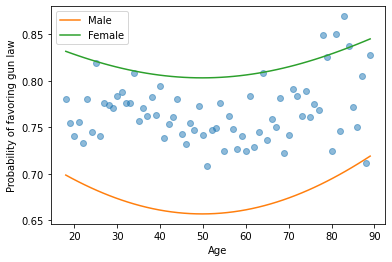

In [44]:
# As we done before we divide respondents into age groups
grouped = gss.groupby('age')
# Compute the mean in each group
favor_by_age = grouped['gunlaw'].mean()
# general plot data
plt.plot(favor_by_age, 'o', alpha=0.5)

# Plot for Males
plt.plot(df['age'], pred1, label='Male')
# Plot for Females
plt.plot(df['age'], pred2, label='Female')

# Label the Axes
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
# Show plot
plt.show()

Here's what it looks like. According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

## Exercise

### Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable ``grass`` records the answer to the question 

> "Do you think the use of marijuana should be made legal or not?"

In [45]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

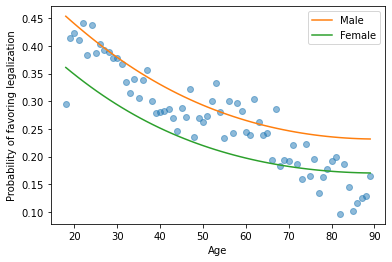

In [49]:
# Make a DataFrame with range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

# Plot for Males
plt.plot(df['age'], pred1, label='Male')
# Plot for Females
plt.plot(df['age'], pred2, label='Female')

# Add Axes
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()

# Show plot
plt.show()